<h4>Explore how weather affects GDP in Industrial based economies</h4>

In [1]:
#import dependencies
import requests 
import json
from pprint import pprint
import os
import pandas as pd
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [7]:
# Read in Weather Data
file_path = os.path.join("Resources", "Merge_data_2005-2015.csv")
df = pd.read_csv(file_path)

df.head()

,Unnamed: 0,ISO3,Country,Year,Temp_Farenheit,Rainfall_mm,GDP
0,0,AFG,Afghanistan,2005,56.087945,29.609967,6.209138e+09
1,1,AFG,Afghanistan,2006,57.501470,27.120458,6.971286e+09
2,2,AFG,Afghanistan,2007,56.320054,25.329681,9.747880e+09
3,3,AFG,Afghanistan,2008,56.755070,21.505365,1.010923e+10
4,4,AFG,Afghanistan,2009,56.807912,31.106477,1.243909e+10


In [3]:
# Filter data for countries with industrial based economies
industrial_ISO3 = ["AGO", "KWT", "MNP", "TLS", "BRN", "GNQ", "AZE", "LBY", "IRQ"]
industrial_df = df[df.ISO3.isin(industrial_ISO3)]

industrial_df.head()


,Unnamed: 0,ISO3,Country,Year,Temp_Farenheit,Rainfall_mm,GDP
44,44,AGO,Angola,2005,72.93929,75.337706,3.697092e+10
45,45,AGO,Angola,2006,71.65607,89.743115,5.238101e+10
46,46,AGO,Angola,2007,71.58845,80.789970,6.526645e+10
47,47,AGO,Angola,2008,71.34569,84.154968,8.853861e+10
48,48,AGO,Angola,2009,72.11462,85.467502,7.030716e+10


Angola


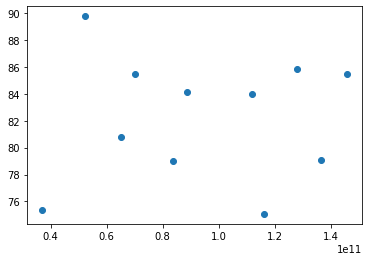

In [19]:
# Create a graph of GDP vs Temp for Angola
ang_df = industrial_df[industrial_df["ISO3"] == "AGO"]
plt.scatter(ang_df["GDP"], ang_df["Rainfall_mm"])
print(str(ang_df.iloc[0]["Country"]))

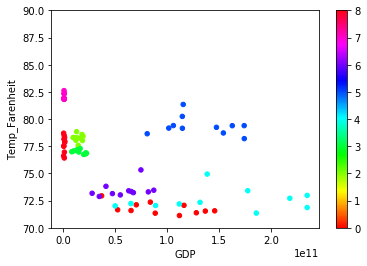

In [92]:
fig, ax = plt.subplots()

other_df = industrial_df.copy(deep=True)

other_df['ISO3'] = other_df['ISO3'].astype('category')

other_df.plot.scatter(ax=ax, x='GDP', y="Temp_Farenheit", subplots=False, c=other_df['ISO3'].cat.codes, colormap='hsv', ylim=(70, 90))

# industrial_df.plot.scatter(x='GDP', y="Temp_Farenheit", c=industrial_df['ISO3'].unique())

# plt.scatter(industrial_df["GDP"], industrial_df["Temp_Farenheit"])

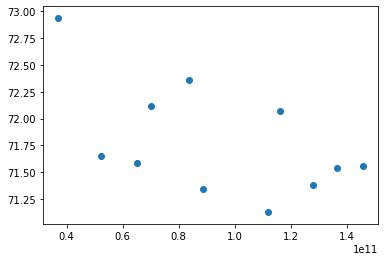

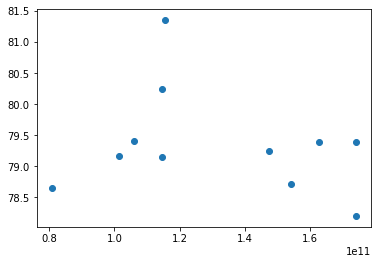

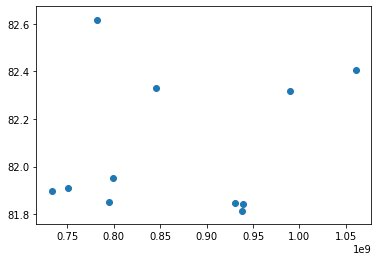

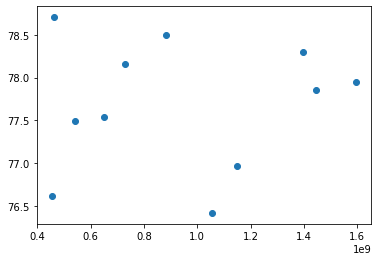

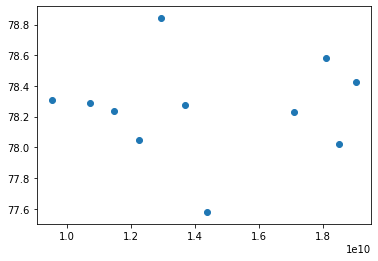

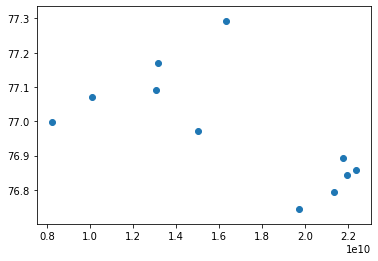

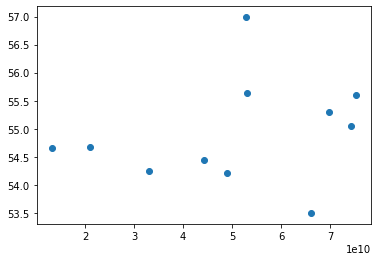

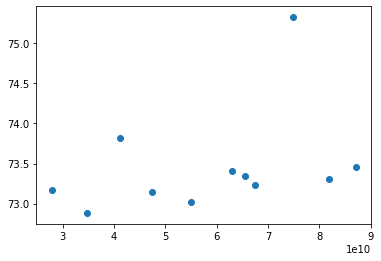

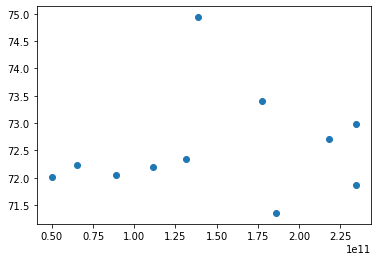

In [15]:
# 

for code in industrial_ISO3:
    country_df = industrial_df[industrial_df["ISO3"] == code]
    plt.figure()
    plt.scatter(country_df["GDP"], country_df["Temp_Farenheit"])
    plt.show()

In [22]:
var_df = industrial_df.drop('Unnamed: 0', axis=1).corr()
var_df


,Year,Temp_Farenheit,Rainfall_mm,GDP
Year,1.000000,0.012692,0.024587,0.235600
Temp_Farenheit,0.012692,1.000000,0.482057,-0.160896
Rainfall_mm,0.024587,0.482057,1.000000,-0.566927
GDP,0.235600,-0.160896,-0.566927,1.000000


In [27]:
var = var_df.iloc[3]["Temp_Farenheit"]
print(var)

-0.160895862806236


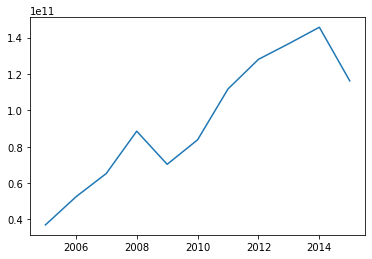

In [95]:
plt.plot(ang_df["Year"], ang_df["GDP"])

,Unnamed: 0,ISO3,Country,Year,Temp_Farenheit,Rainfall_mm,GDP
44,44,AGO,Angola,2005,72.939290,75.337706,3.697092e+10
45,45,AGO,Angola,2006,71.656070,89.743115,5.238101e+10
46,46,AGO,Angola,2007,71.588450,80.789970,6.526645e+10
47,47,AGO,Angola,2008,71.345690,84.154968,8.853861e+10
48,48,AGO,Angola,2009,72.114620,85.467502,7.030716e+10
...,...,...,...,...,...,...,...
1920,1920,TLS,Timor Leste,2011,76.422080,177.178219,1.054726e+09
1921,1921,TLS,Timor Leste,2012,76.963505,136.245473,1.147780e+09
1922,1922,TLS,Timor Leste,2013,78.301475,176.895558,1.395525e+09
1923,1923,TLS,Timor Leste,2014,77.854040,128.740425,1.447312e+09
